# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

        #https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
        
    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key + "&units=metric"

    city_url
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | ust-nera
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | enewetak
Processing Record 10 of Set 1 | kupang
Processing Record 11 of Set 1 | college
Processing Record 12 of Set 1 | mount isa
Processing Record 13 of Set 1 | fray luis beltran
Processing Record 14 of Set 1 | dingwall
Processing Record 15 of Set 1 | kwang binh
Processing Record 16 of Set 1 | cabo san lucas
Processing Record 17 of Set 1 | margaret river
Processing Record 18 of Set 1 | pacific grove
Processing Record 19 of Set 1 | olonkinbyen
Processing Record 20 of Set 1 | remire-montjoly
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set

In [53]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [54]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,2.81,100,75,3.13,AR,1699699137
1,puerto ayora,-0.7393,-90.3518,23.64,89,80,1.79,EC,1699699138
2,port-aux-francais,-49.3500,70.2167,3.01,66,51,7.92,TF,1699699138
3,ust-nera,64.5667,143.2000,-32.43,98,73,1.95,RU,1699699139
4,bilibino,68.0546,166.4372,-29.99,100,92,1.56,RU,1699699139


In [55]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [56]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,2.81,100,75,3.13,AR,1699699137
1,puerto ayora,-0.7393,-90.3518,23.64,89,80,1.79,EC,1699699138
2,port-aux-francais,-49.3500,70.2167,3.01,66,51,7.92,TF,1699699138
3,ust-nera,64.5667,143.2000,-32.43,98,73,1.95,RU,1699699139
4,bilibino,68.0546,166.4372,-29.99,100,92,1.56,RU,1699699139


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

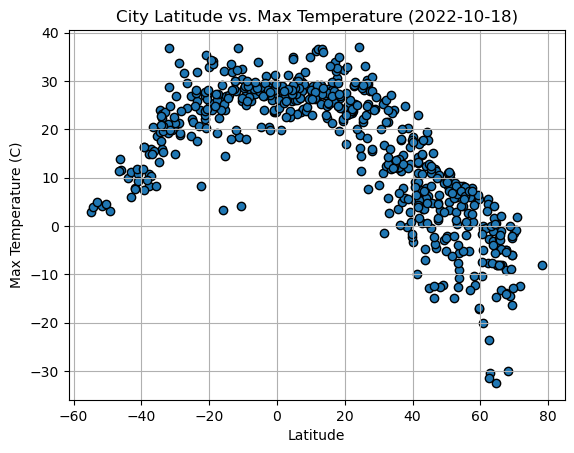

In [57]:
# Build scatter plot for latitude vs. temperature in Celsius

x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

plt.scatter(x_values, y_values, edgecolors="black")

# Set plot title and labels
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

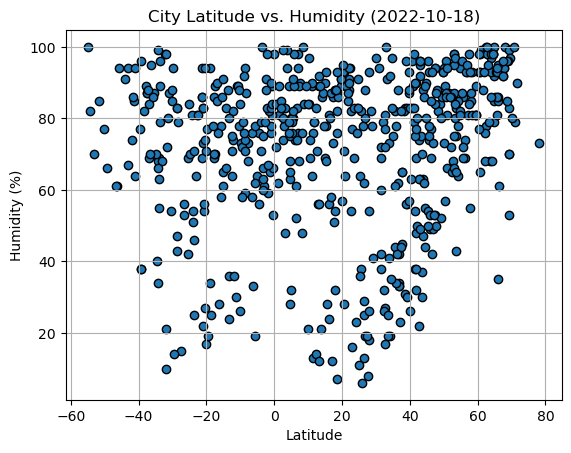

In [58]:
#Build scatter plot for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

plt.scatter(x_values, y_values, edgecolors="black")

#Set plot title and labels
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid()

#Save the figure
plt.savefig("../output_data/Fig2.png")

#Show plot
plt.show()

#### Latitude Vs. Cloudiness

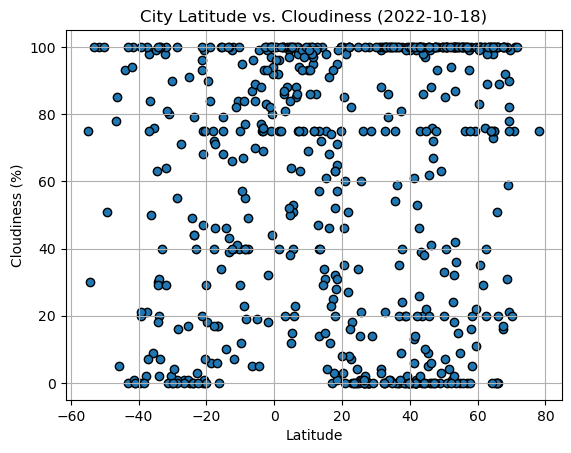

In [59]:
#Build scatter plot for latitude vs. cloudiness
x_values = city_data_df["Lat"] 
y_values = city_data_df["Cloudiness"]

plt.scatter(x_values, y_values, edgecolors="black", marker="o")


#Set plot title and labels
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

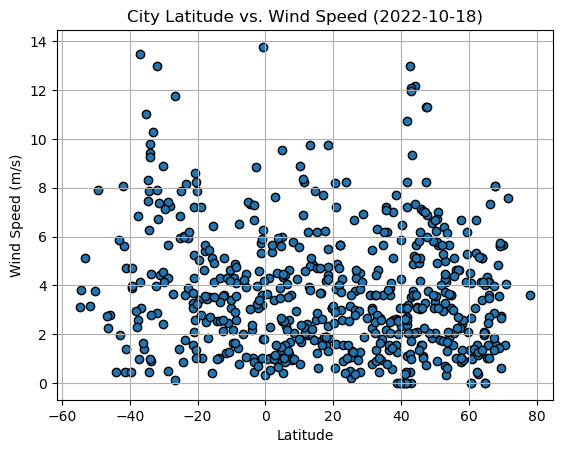

In [60]:
# Build scatter plot for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

plt.scatter(x_values, y_values, edgecolors="black", marker="o")

# Set plot title and labels
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [61]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#after scatter

#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,0),fontsize=15,color="red")

In [62]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northernhem = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northernhem.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,ust-nera,64.5667,143.2000,-32.43,98,73,1.95,RU,1699699139
4,bilibino,68.0546,166.4372,-29.99,100,92,1.56,RU,1699699139
6,ribeira grande,38.5167,-28.7000,20.22,83,20,7.72,PT,1699699067
8,enewetak,11.3474,162.3373,28.56,76,95,8.25,MH,1699699142
10,college,64.8569,-147.8028,-8.03,79,100,0.00,US,1699699144


In [63]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

#conversion

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,2.81,100,75,3.13,AR,1699699137
1,puerto ayora,-0.7393,-90.3518,23.64,89,80,1.79,EC,1699699138
2,port-aux-francais,-49.3500,70.2167,3.01,66,51,7.92,TF,1699699138
5,waitangi,-43.9535,-176.5597,9.90,91,93,0.45,NZ,1699699140
7,blackmans bay,-43.0167,147.3167,11.07,67,0,1.96,AU,1699699141


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7478863171698963


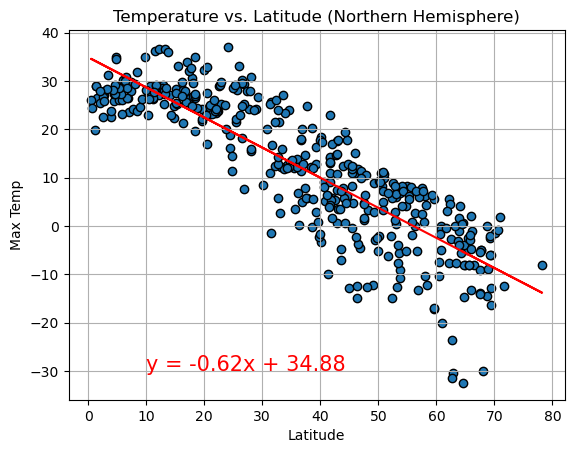

In [64]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northernhem["Lat"]
y_values = northernhem["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")


plt.scatter(x_values, y_values, edgecolors="black", marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10, -30),fontsize=15,color="red")

# Set plot title and labels
plt.title("Temperature vs. Latitude (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig5.png")

# Show plot
plt.show()


The r-value is: 0.4734466873499932


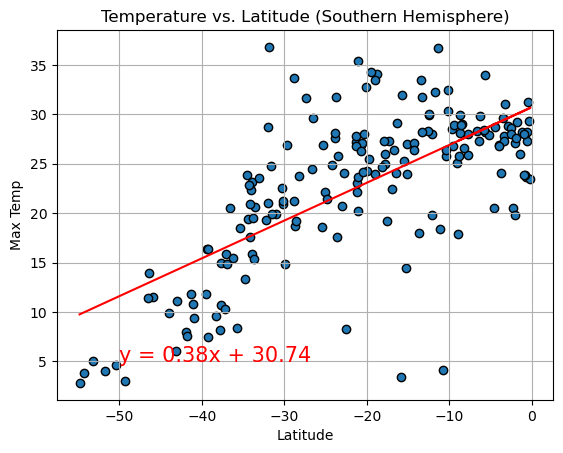

In [65]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")


plt.scatter(x_values, y_values, edgecolors="black", marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 5),fontsize=15,color="red")

# Set plot title and labels
plt.title("Temperature vs. Latitude (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig6.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [66]:
#There is a strong linear relation ship between latitude and temprature. As latitude increases max temps get lower in the northern hemisphere, and as latitude increases max temps also increase in the southern hemisphere 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.04022071201730551


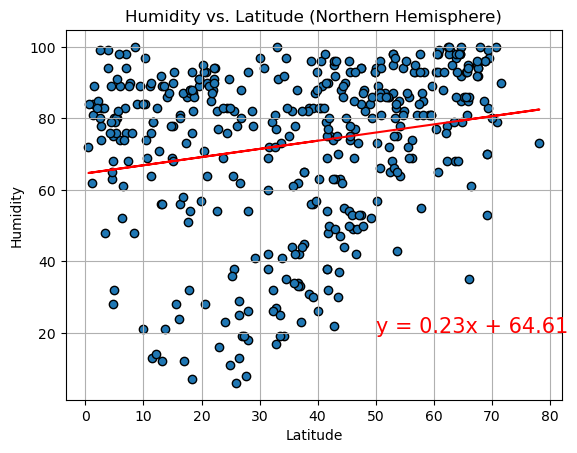

In [67]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northernhem["Lat"]
y_values = northernhem["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")


plt.scatter(x_values, y_values, edgecolors="black", marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50, 20),fontsize=15,color="red")

# Set plot title and labels
plt.title("Humidity vs. Latitude (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig7.png")

# Show plot
plt.show()

The r-value is: 0.0016437125656905529


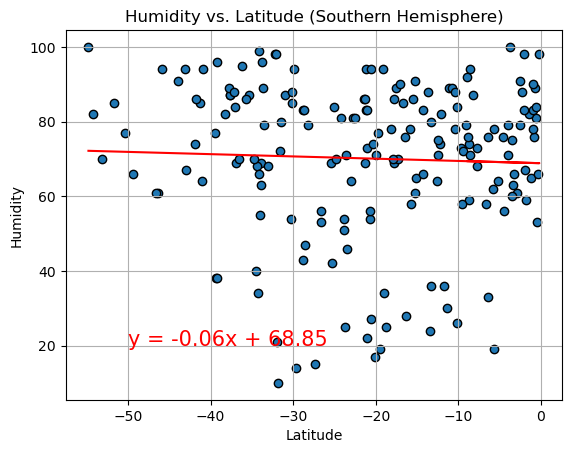

In [68]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")


plt.scatter(x_values, y_values, edgecolors="black", marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 20),fontsize=15,color="red")

# Set plot title and labels
plt.title("Humidity vs. Latitude (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig8.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [69]:
#There is no linear realationship between humidity and latitude in both nothern and southern hemispheres as both r values are close to 0

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 6.341634008482551e-05


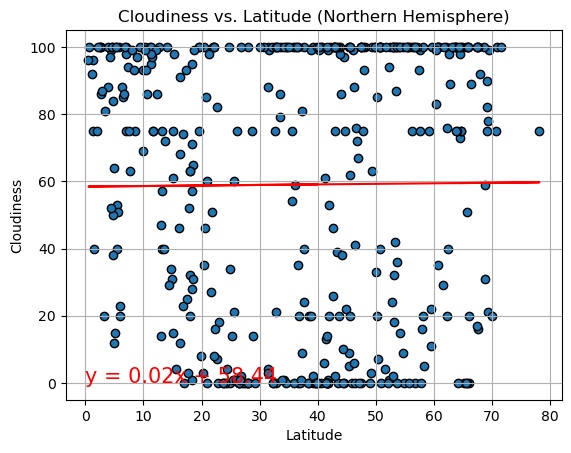

In [70]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northernhem["Lat"]
y_values = northernhem["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")


plt.scatter(x_values, y_values, edgecolors="black", marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

# Set plot title and labels
plt.title("Cloudiness vs. Latitude (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig9.png")

# Show plot
plt.show()

The r-value is: 0.03981679554672903


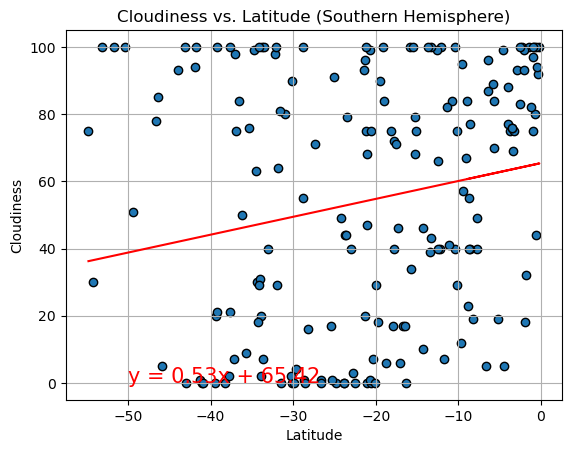

In [71]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")


plt.scatter(x_values, y_values, edgecolors="black", marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 0),fontsize=15,color="red")

# Set plot title and labels
plt.title("Cloudiness vs. Latitude (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig10.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [72]:
#there is also no linear relationship between cloudiness and latitude as both values are very close to 0

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0008282249858344706


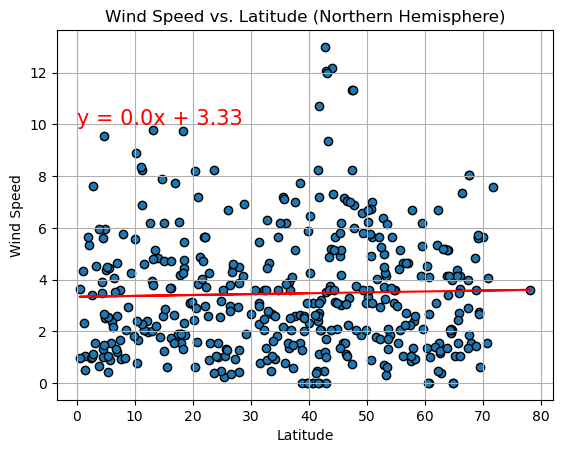

In [73]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northernhem["Lat"]
y_values = northernhem["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")


plt.scatter(x_values, y_values, edgecolors="black", marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")

# Set plot title and labels
plt.title("Wind Speed vs. Latitude (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig11.png")

# Show plot
plt.show()

The r-value is: 0.02024321546110324


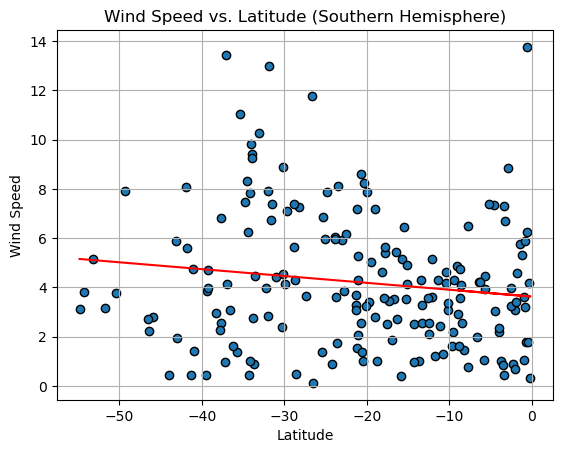

In [74]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")


plt.scatter(x_values, y_values, edgecolors="black", marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 15),fontsize=15,color="red")

# Set plot title and labels
plt.title("Wind Speed vs. Latitude (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig12.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [50]:
#There is no relationship between wind speed and latitude as both r values are too close to zero